In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mehulsmritiraje/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## I. Architectures Encoding Functions

**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

**Exercise #1:** For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connects the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer
<img src="single_hidden_layer.jpg" style="width: 600px;" align="center"/>

## II. Regression

**Motivating Question:** We saw in Part I that each neural network represents a function that depends on our choice of activation function for each node. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer)?
<img src="activation-functions.png" style="width: 600px;" align="center"/>

**Exercise #2:** In the following, we fix a function and approximate it using a polynomial model as well as a multi-layer perceptron (MLP) network. Investigate the effects of the network architecture on the quality of the approximation. Discuss the pro's and con's of using each model.

In [6]:
import numpy as np

In [7]:
# set the number of samples to take for each toy dataset
n_samples = 1000
# set the proportion of toy data to hold out for testing
test_size = 0.3
# set the random seed to make the experiment reproducible 
random_seed = 1
np.random.seed(random_seed)

In [8]:
# define a function
f = lambda x: np.sin(np.sqrt(x))**2
# choose some points from the function - this is our toy dataset 
X = np.random.permutation(np.linspace(0, 50, n_samples))
Y = f(X)
# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

/Users/mehulsmritiraje/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


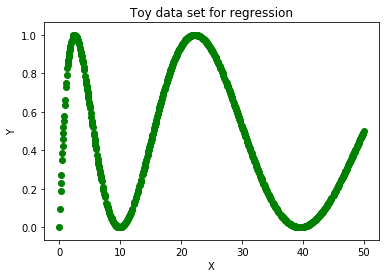

In [9]:
# plot the toy data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, color='green')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy data set for regression')
plt.show()

Let's first fit a polynomial model to the toy data set. ***Here you should experiment with the degree of the polynomial and observe the effects this has on the fit.*** You want to think about issues like computational effeciency and generalizability of this type of modeling.

In [10]:
# degree of the polynomial model - play around with this!
degree = 4
# add polynomial features to the data and fit a ridge regression model
simple_model = make_pipeline(PolynomialFeatures(degree), Ridge())
simple_model.fit(X_train.reshape((X_train.shape[0], 1)), Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

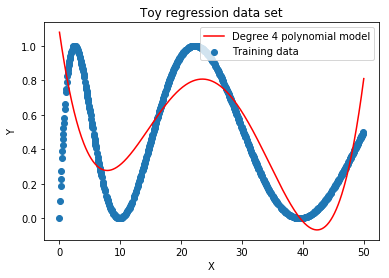

In [11]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500).reshape((500, 1))
y_pred = simple_model.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='Degree ' + str(degree) + ' polynomial model')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [12]:
# evaluate the model
print('Train R2:', simple_model.score(X_test.reshape((X_test.shape[0], 1)), Y_test))
print('Test R2:', r2(Y_test, simple_model.predict(X_test.reshape((X_test.shape[0], 1)))))

Train R2: 0.6687278841455039
Test R2: 0.6687278841455039


Now let's fit a MLP network with a single hidden layer. Start with sigmoid or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 

***Experiment with the number of hidden nodes and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your polynomial model (in terms of quality of fit, efficiency and generalizability).

***Experiment with different activation functions and observe the effect of this on the quality of the fit.*** 

In [30]:
X_train.shape

(700,)

In [65]:
from keras import layers

# number of hidden nodes
H = 500
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model = Sequential()
# layer 0
# model.add(...) 
model.add(Dense(H, input_shape = (input_dim,), kernel_initializer='normal', activation='tanh'))

# layer 1
# model.add(...) 
# model.add(Dense(1, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))

# configure the model
# model.compile(...)
model.compile(optimizer='adam', # optimization - lots of equally okay soln and it gets stuck. 
              # because solution is not convex. SGD gets stuck
                  loss='mean_squared_error', # minimise the msq; think about drawbacks of this choice; 
              # here, overfitting
                  metrics=['accuracy'])

# Why not polynomial? Specific nonlinearity, not very flexible, putting legos together for enough expressiveness
# NN is a more general schema

In [66]:
# fit the model
model.fit(X_train,Y_train, epochs=300)

Epoch 1/300
700/700 [==============================] - 1s 803us/step - loss: 0.1787 - acc: 0.0014
Epoch 2/300
700/700 [==============================] - 0s 49us/step - loss: 0.1136 - acc: 0.0014
Epoch 3/300
700/700 [==============================] - 0s 76us/step - loss: 0.0943 - acc: 0.0014
Epoch 4/300
700/700 [==============================] - 0s 83us/step - loss: 0.0881 - acc: 0.0014
Epoch 5/300
700/700 [==============================] - 0s 49us/step - loss: 0.0875 - acc: 0.0014
Epoch 6/300
700/700 [==============================] - 0s 81us/step - loss: 0.0795 - acc: 0.0000e+00
Epoch 7/300
700/700 [==============================] - 0s 43us/step - loss: 0.0848 - acc: 0.0000e+00
Epoch 8/300
700/700 [==============================] - 0s 101us/step - loss: 0.0805 - acc: 0.0000e+00
Epoch 9/300
700/700 [==============================] - 0s 43us/step - loss: 0.0781 - acc: 0.0000e+00
Epoch 10/300
700/700 [==============================] - 0s 73us/step - loss: 0.0714 - acc: 0.0000e+00
Epoch 1

700/700 [==============================] - 0s 52us/step - loss: 0.0549 - acc: 0.0000e+00
Epoch 82/300
700/700 [==============================] - 0s 57us/step - loss: 0.0546 - acc: 0.0000e+00
Epoch 83/300
700/700 [==============================] - 0s 44us/step - loss: 0.0571 - acc: 0.0000e+00
Epoch 84/300
700/700 [==============================] - 0s 67us/step - loss: 0.0579 - acc: 0.0000e+00
Epoch 85/300
700/700 [==============================] - 0s 59us/step - loss: 0.0594 - acc: 0.0000e+00
Epoch 86/300
700/700 [==============================] - 0s 63us/step - loss: 0.0601 - acc: 0.0000e+00
Epoch 87/300
700/700 [==============================] - 0s 61us/step - loss: 0.0548 - acc: 0.0000e+00
Epoch 88/300
700/700 [==============================] - 0s 73us/step - loss: 0.0605 - acc: 0.0000e+00
Epoch 89/300
700/700 [==============================] - 0s 63us/step - loss: 0.0612 - acc: 0.0000e+00
Epoch 90/300
700/700 [==============================] - 0s 57us/step - loss: 0.0611 - acc: 0.00

700/700 [==============================] - 0s 72us/step - loss: 0.0452 - acc: 0.0000e+00
Epoch 161/300
700/700 [==============================] - 0s 54us/step - loss: 0.0414 - acc: 0.0000e+00
Epoch 162/300
700/700 [==============================] - 0s 63us/step - loss: 0.0394 - acc: 0.0000e+00
Epoch 163/300
700/700 [==============================] - 0s 46us/step - loss: 0.0390 - acc: 0.0000e+00
Epoch 164/300
700/700 [==============================] - 0s 72us/step - loss: 0.0418 - acc: 0.0000e+00
Epoch 165/300
700/700 [==============================] - 0s 52us/step - loss: 0.0426 - acc: 0.0000e+00
Epoch 166/300
700/700 [==============================] - 0s 50us/step - loss: 0.0388 - acc: 0.0000e+00
Epoch 167/300
700/700 [==============================] - 0s 66us/step - loss: 0.0409 - acc: 0.0000e+00
Epoch 168/300
700/700 [==============================] - 0s 58us/step - loss: 0.0416 - acc: 0.0000e+00
Epoch 169/300
700/700 [==============================] - 0s 50us/step - loss: 0.0371 - 

700/700 [==============================] - 0s 55us/step - loss: 0.0375 - acc: 0.0014
Epoch 241/300
700/700 [==============================] - 0s 53us/step - loss: 0.0257 - acc: 0.0014
Epoch 242/300
700/700 [==============================] - 0s 54us/step - loss: 0.0238 - acc: 0.0014
Epoch 243/300
700/700 [==============================] - 0s 56us/step - loss: 0.0317 - acc: 0.0014
Epoch 244/300
700/700 [==============================] - 0s 89us/step - loss: 0.0269 - acc: 0.0014
Epoch 245/300
700/700 [==============================] - 0s 72us/step - loss: 0.0235 - acc: 0.0014
Epoch 246/300
700/700 [==============================] - 0s 52us/step - loss: 0.0271 - acc: 0.0014
Epoch 247/300
700/700 [==============================] - 0s 100us/step - loss: 0.0252 - acc: 0.0014
Epoch 248/300
700/700 [==============================] - 0s 59us/step - loss: 0.0245 - acc: 0.0014
Epoch 249/300
700/700 [==============================] - 0s 61us/step - loss: 0.0219 - acc: 0.0014
Epoch 250/300
700/700 [

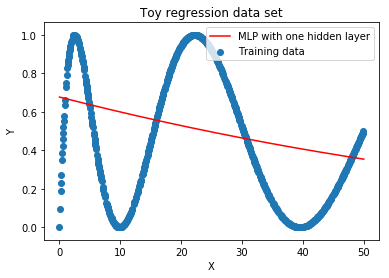

In [64]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500)
y_pred = model.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='MLP with one hidden layer')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [61]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

Train loss: [0.11948514699935914, 0.0]
Train R2: -0.01693619620689102


In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Train R2:', r2(Y_test, model.predict(X_test)))

Test loss: [0.11803353786468505, 0.0]
Train R2: 0.04426876127104151


In [ ]:
# Plot the train/test performace against the number of hidden nodes, H
input_dim = 1

for H in [100, 200, 300, 400, 500]:
    model = Sequential()
    model.add(Dense(H, input_shape = (input_dim,)))
    model.add(Dense(1, activation='softplus'))
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

Now fix a width $H$ and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with sigmoid or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 


***Experiment with the number of layers and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your polynomial model as well as to the model with a single hidden layer (in terms of quality of fit, efficiency and generalizability).

In [17]:
# number of hidden nodes
H = 40
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = Sequential()
# layer 0
# model2.add(...) 

# layer 1
# model2.add(...) 

# layer 2
# model2.add(...) 

# layer 3
# model2.add(...) 

# layer 4
# model2.add(...) 

# layer 5
# model2.add(...) 

# layer 6
# model2.add(...) 

# configure the model
# model2.compile(...)

In [2]:
# fit the model
# model2.fit(...)

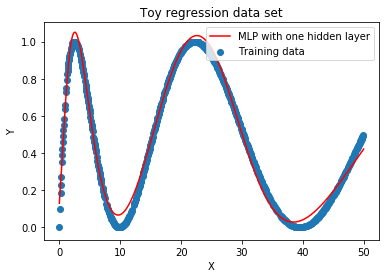

In [19]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500)
y_pred = model2.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='MLP with one hidden layer')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [20]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

Train loss: 0.00116614405132
Train R2: 0.990074966382


In [21]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Train R2:', r2(Y_test, model2.predict(X_test)))

Test loss: 0.00134764289483
Train R2: 0.989087979587


What if we wanted to approximate a different function $f$ with MLP's? ***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?

## III. Latent Features

In Part II, you've seen some evidence that MLP's (even with one single hidden layer) can approximate a large number of functions. In fact, one can prove that **an MLP with a single arbitrarily wide hidden layer can approximate any continuous function on a fixed interval**. 

This means that MLP's are suitable for regression. What about for classification?

Recall that we often model classification problem as regression on the class probability vector. That is, we want to predict the probaility of a point being given a certain class label depending on its covariates. 

Recall also that the decision boundaries (where the class probabilites are equal and thus the model is most uncertain) for most classification data sets are non-linear (the classes cannot be separated in input space by a line or a flat surface). To learn such boundaries, we typically 

1. apply a non-linear transformation to the input data (say by adding polynomial features)
2. then fit a linear decision boundary (e.g. logistic regression or SVC)

Here, the non-linearity of the functions represented by MLP's can help us combine the two tasks into one. That is, we don't need to preprocess the data to add non-linear features, since the MLP will learn the best non-linear transformations to the input in order to achieve the best classification. Thus, this gives us a very intuitive way to interpret the output of the hidden layers of an MLP in a classification task:

> ***Outputs of each hidden layer of an MLP is a non-linear transformation of the input data into a feature space. Each hidden layer should transform the input so that it is more linearly separable.***

In the following, we interpret the hidden outputs of MLP's in a classification task as mappings of our data into different feature spaces.

**Exercise #3:** Train an MLP for a binary classification task on two dimensional data. For each input $\mathbf{x} \in \mathbb{R}^D$, and each hidden layer $l$, extract the output at layer $l$, $\mathbf{x}_l \in \mathbb{R}^H$, we call this the *latent representation of $\mathbf{x}$* at layer $l$. For each layer, scatter plot the laten representation of the training data. What is happening to the data in each layer of the MLP? Relate the geometric observations to the performance of the MLP as a classifier.

***Note:*** You will see later during the semester that often times, we are more interested in learning the latent representation of the data rather than perfecting our performance in a single task (such as classification). 

In [22]:
# generate a toy classification data set with non-linear decision boundary
X, Y = make_moons(noise=0.05, random_state=random_seed, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

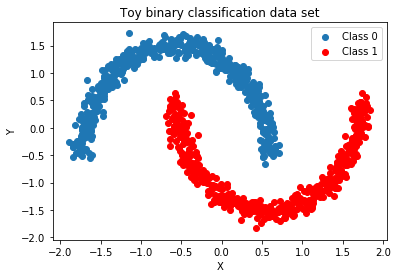

In [23]:
# scatter plot the data, color each class differently
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set')
plt.show()

In [24]:
# fit a logistic regression model to classify this data set as a benchmark 
simple_model = LogisticRegression()
simple_model.fit(X_train, Y_train)
print('Train accuracy:', simple_model.score(X_train, Y_train))
print('Test accuracy:', simple_model.score(X_test, Y_test))

Train accuracy: 0.887142857143
Test accuracy: 0.886666666667


Now fix a width $H = 2$ (so that we can scatter plot the latent representations of our data at each layer) and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 

***Experiment with the number of layers and observe the effect of this on the quality of the classification.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your logistic regression model (in terms of quality of fit, efficiency and generalizability).

In [25]:
# fix a width that is suited for visualizing the output of hidden layers
H = 2
input_dim = X.shape[1]

# create sequential multi-layer perceptron
model = Sequential()
#layer 0
# model.add(...) 

#layer 1
# model.add(...) 

#layer 2
# model.add(...) 

#layer 3
# model.add(...) 

#layer 4
# model.add(...) 

#layer 5
# model.add(...) 

#binary classification, one output
# model.add(...) 

# configure the model
# model.compile(...) 

In [3]:
# fit the model
# model.fit(...) 

# Log Reg is secretly regression, we see prob of 0/1 and not 0/1 itself
# Polynomial is a kernel feature - preprocess, fit linear model, NN does both in one stretch
# Hidden layer is like feature map, does something to data.

In [27]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0135606805235
Train accuracy: 1.0


In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0138784240186
Test accuracy: 1.0


Now let's plot the latent representations of our data given by each hidden layer.

To do this, we need to extract the weights learned by our model up to layer $l$, then configure another MLP with only $l$ layers using these weights and then run our training data through the second MLP.

In [29]:
# get the class probabilities predicted by our MLP on the training set
Y_train_pred = model.predict(X_train)

In [30]:
# define another MLP with no hidden layer (only input and output) using 
# the weights between the input and the first hidden layer from the classifier we just learned
latent_model = Sequential()
latent_model.add(Dense(H, input_dim=input_dim, weights=model.layers[0].get_weights(), activation='tanh'))
activations = latent_model.predict(X_train)

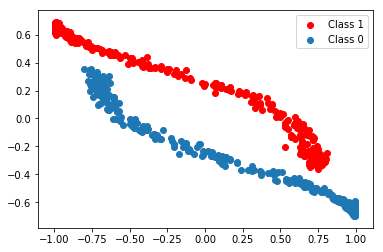

In [31]:
# plot the latent representation of our training data at the first hidden layer
Y_train_pred = Y_train_pred.reshape((Y_train_pred.shape[0], ))

fig, ax = plt.subplots()
ax.scatter(activations[Y_train_pred >= 0.5, 0], activations[Y_train_pred >= 0.5, 1], color='r', label='Class 1')
ax.scatter(activations[Y_train_pred < 0.5, 0], activations[Y_train_pred < 0.5, 1], label='Class 0')
ax.legend()
plt.show()

Now do this visualization for each of the seven hidden layers in your MLP classifier. How is the data being transformed from layer to layer?

In [4]:
# extract the latent representation of your data at layer 1 of the MLP
# etc...

## IV. Sensitivity

As you have no doubt noticed, your learning algorithm for fitting the MLP's do not always end up with the same solution. Stochasticity is introduced in the learning process in two places:

1. the optimization is potentially not exact (we use stochastic gradients)
2. the objective is generally non-convex (i.e. there are possibly many 'pretty good' solutions and our algorithms tend to get stuck in them rather than seek out 'the absolute best' solutison) and so the solution you find will depend on where you initialize the optimization (i.e. check your initialization for the weights).

**Exercise #4:** For the regression problem in Part II, fit multiple MLP's initializing the weights randomnly, plot the functions you get from each of your random restart solutions. How big is the variability?

Often, the problem of non-unqiueness of the solution to the optimization problem of learning an MLP is exacerbated by the scarcity of data. In fact people often say that deep learning requires big data. 

**Exercise #5:** What is potentially problemmatic about training an MLP when the number of training data points is small? (*Hint:* look at the closed form expression for the function represented by an MLP with a single hidden layer and treat this simply as a ordinary least squares regression problem from CS109A). How can we generalize techniques for handling potential pathologies of regression or classification problems (again from CS109A and the first half of CS109B) to MLP models?